In [1]:
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
import matplotlib.patches as mpatches
# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt
# Import seaborn for visualisation/plotting
import seaborn as sns

%matplotlib inline



In [2]:
# Read the trainning file
route46A = pd.read_csv('final_46A_weather.csv')

In [3]:
route46A.head()

,Unnamed: 0,arrive_time,date,day,dayofweek,dt,duration,end_point,month,rain,rhum,start_point,temp,tripid,vis,wddir,wdsp
0,0,53397,1.543762e+09,2,6,NaN,48.0,808.0,12,0.0,80.0,807,12.7,8153562.0,15000.0,200.0,11.0
1,1,53445,1.543762e+09,2,6,NaN,42.0,809.0,12,0.0,80.0,808,12.7,8153562.0,15000.0,200.0,11.0
2,2,53487,1.543762e+09,2,6,NaN,82.0,810.0,12,0.0,80.0,809,12.7,8153562.0,15000.0,200.0,11.0
3,3,53569,1.543762e+09,2,6,NaN,27.0,811.0,12,0.0,80.0,810,12.7,8153562.0,15000.0,200.0,11.0
4,4,53596,1.543762e+09,2,6,NaN,83.0,812.0,12,0.0,80.0,811,12.7,8153562.0,15000.0,200.0,11.0


In [5]:
route46A = route46A.drop('Unnamed: 0', axis=1)
route46A = route46A.drop('dt', axis=1)

In [6]:
route46A.head()

,arrive_time,date,day,dayofweek,duration,end_point,month,rain,rhum,start_point,temp,tripid,vis,wddir,wdsp
0,53397,1.543762e+09,2,6,48.0,808.0,12,0.0,80.0,807,12.7,8153562.0,15000.0,200.0,11.0
1,53445,1.543762e+09,2,6,42.0,809.0,12,0.0,80.0,808,12.7,8153562.0,15000.0,200.0,11.0
2,53487,1.543762e+09,2,6,82.0,810.0,12,0.0,80.0,809,12.7,8153562.0,15000.0,200.0,11.0
3,53569,1.543762e+09,2,6,27.0,811.0,12,0.0,80.0,810,12.7,8153562.0,15000.0,200.0,11.0
4,53596,1.543762e+09,2,6,83.0,812.0,12,0.0,80.0,811,12.7,8153562.0,15000.0,200.0,11.0


In [7]:
route46A.dtypes

arrive_time      int64
date           float64
day              int64
dayofweek        int64
duration       float64
end_point      float64
month            int64
rain           float64
rhum           float64
start_point      int64
temp           float64
tripid         float64
vis            float64
wddir          float64
wdsp           float64
dtype: object

In [8]:
route46A['start_point'] = route46A['start_point'].astype('int')
route46A['end_point'] = route46A['end_point'].astype('int')
route46A.head()

,arrive_time,date,day,dayofweek,duration,end_point,month,rain,rhum,start_point,temp,tripid,vis,wddir,wdsp
0,53397,1.543762e+09,2,6,48.0,808,12,0.0,80.0,807,12.7,8153562.0,15000.0,200.0,11.0
1,53445,1.543762e+09,2,6,42.0,809,12,0.0,80.0,808,12.7,8153562.0,15000.0,200.0,11.0
2,53487,1.543762e+09,2,6,82.0,810,12,0.0,80.0,809,12.7,8153562.0,15000.0,200.0,11.0
3,53569,1.543762e+09,2,6,27.0,811,12,0.0,80.0,810,12.7,8153562.0,15000.0,200.0,11.0
4,53596,1.543762e+09,2,6,83.0,812,12,0.0,80.0,811,12.7,8153562.0,15000.0,200.0,11.0


In [9]:
route46A['arrive_time'] = route46A['arrive_time'].divide(1800).round()
route46A['arrive_time'] = route46A['arrive_time'].astype('int')


In [11]:
route46A['arrive_time'].unique()

array([30, 31, 32, 33, 29, 24, 25, 26, 27, 20, 21, 22, 23, 35, 36, 37, 38,
       39, 28, 34, 40, 41, 42, 47, 48, 45, 46, 43, 44, 19, 18, 17, 14, 15,
       16, 13, 12, 49], dtype=int64)

In [12]:
# Select the categorical ferature
categorical = ['arrive_time','day','dayofweek','start_point','end_point',]

# Convert them to categorical
for col in categorical:
    route46A[col] = route46A[col].astype('category')

route46A.dtypes

arrive_time    category
date            float64
day            category
dayofweek      category
duration        float64
end_point      category
month             int64
rain            float64
rhum            float64
start_point    category
temp            float64
tripid          float64
vis             float64
wddir           float64
wdsp            float64
dtype: object

In [13]:
route46A.head()

,arrive_time,date,day,dayofweek,duration,end_point,month,rain,rhum,start_point,temp,tripid,vis,wddir,wdsp
0,30,1.543762e+09,2,6,48.0,808,12,0.0,80.0,807,12.7,8153562.0,15000.0,200.0,11.0
1,30,1.543762e+09,2,6,42.0,809,12,0.0,80.0,808,12.7,8153562.0,15000.0,200.0,11.0
2,30,1.543762e+09,2,6,82.0,810,12,0.0,80.0,809,12.7,8153562.0,15000.0,200.0,11.0
3,30,1.543762e+09,2,6,27.0,811,12,0.0,80.0,810,12.7,8153562.0,15000.0,200.0,11.0
4,30,1.543762e+09,2,6,83.0,812,12,0.0,80.0,811,12.7,8153562.0,15000.0,200.0,11.0


In [14]:
route46A.select_dtypes(['category']).describe().T

,count,unique,top,freq
arrive_time,1683624,38,38,58550
day,1683624,31,23,61944
dayofweek,1683624,7,1,277472
end_point,1683624,58,7353,29028
start_point,1683624,58,7353,29028


In [18]:
continuous = ['temp','wdsp','wddir','vis','rhum', 'rain']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217896155F8>,
      dtype=object)

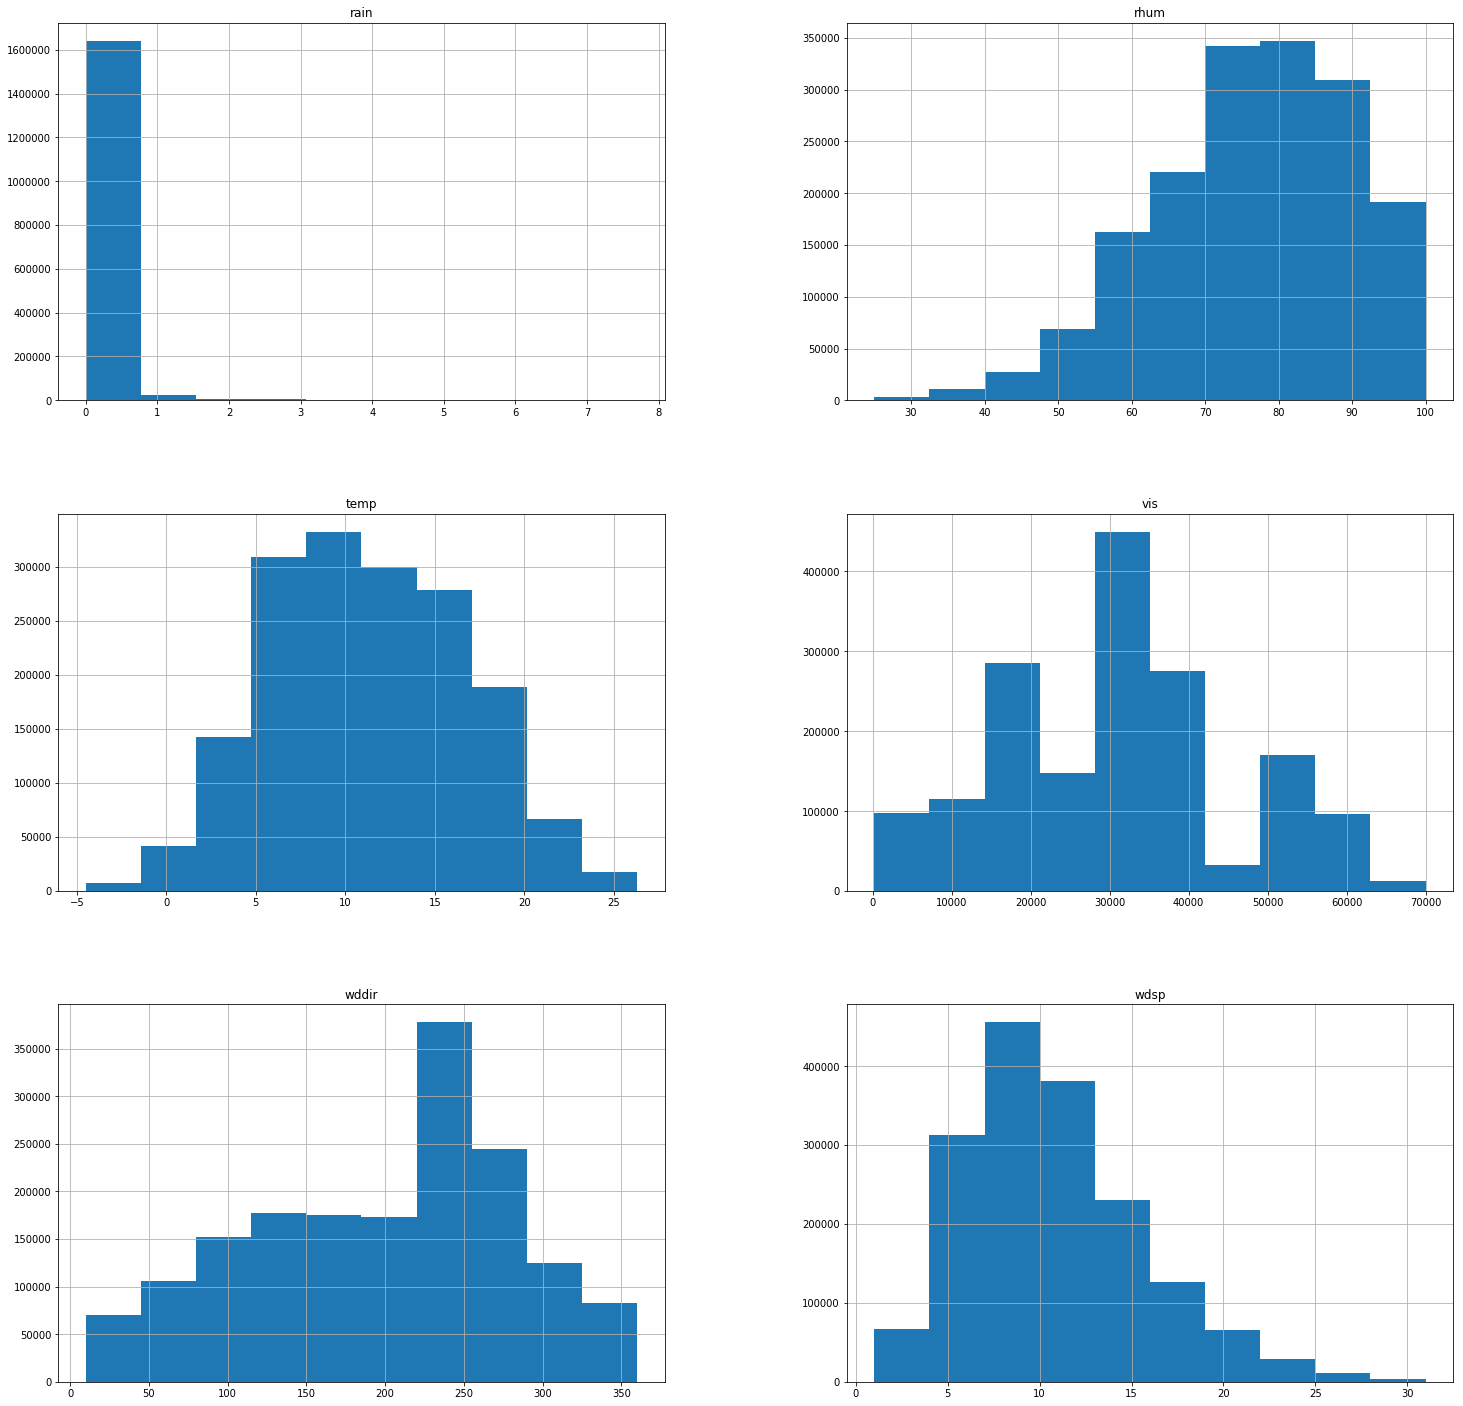

In [19]:

route46A[continuous].hist(figsize=(25,25))

In [20]:
route46A['rain'].unique()

array([0. , 0.7, 0.1, 0.2, 0.6, 0.4, 0.5, 0.3, 0.8, 2.6, 1.4, 1.5, 1.7,
       2.4, 1.6, 1. , 0.9, 1.3, 1.8, 2.8, 3.1, 7.7, 2.9, 2.5, 2. , 3. ,
       1.2, 7.2, 5.3, 4.1, 1.1, 2.7, 2.3, 3.8, 3.5, 3.3, 2.2, 3.2, 4.4,
       1.9, 5.5])

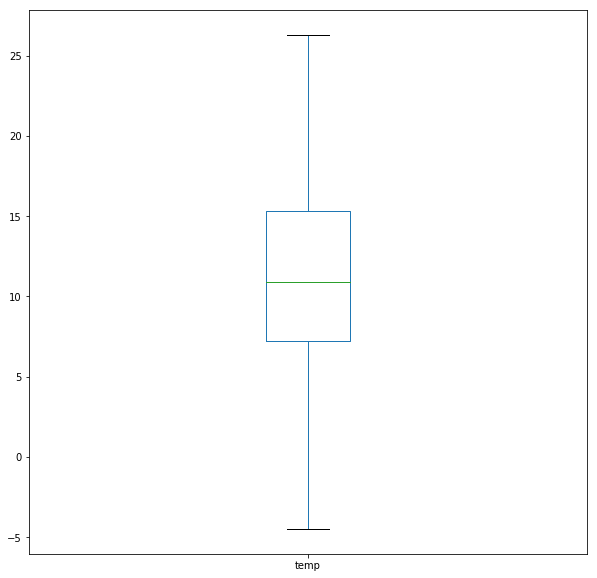

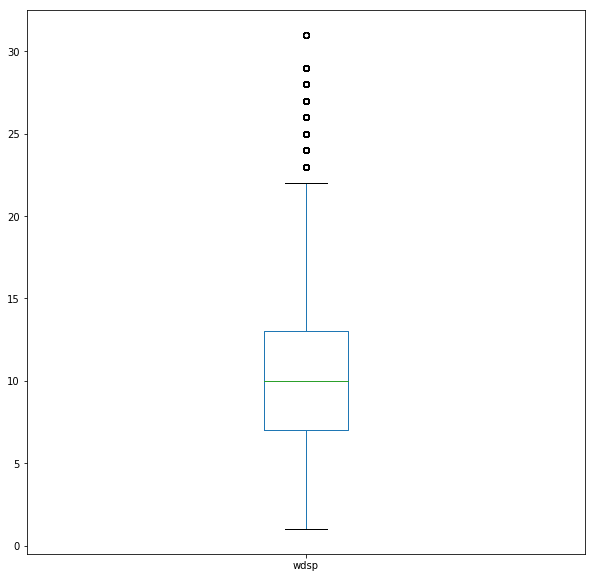

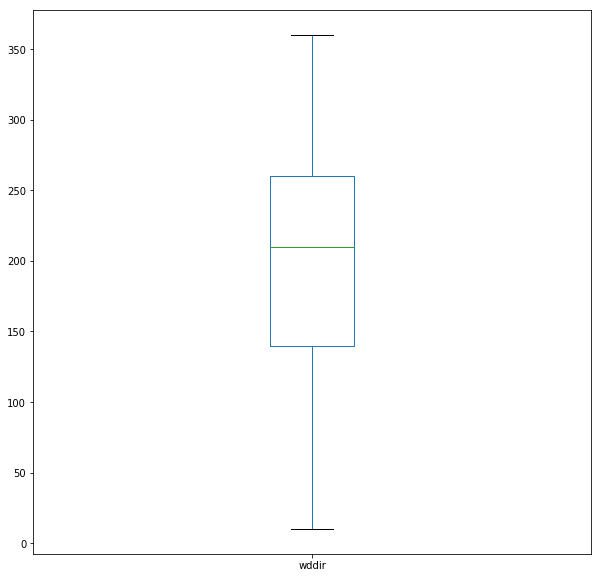

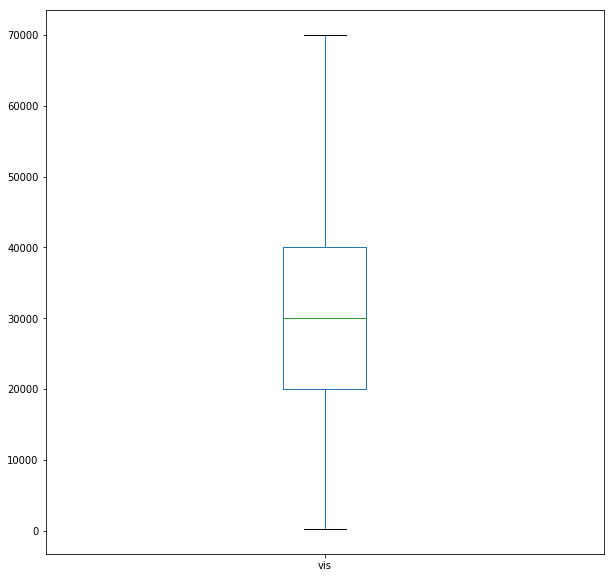

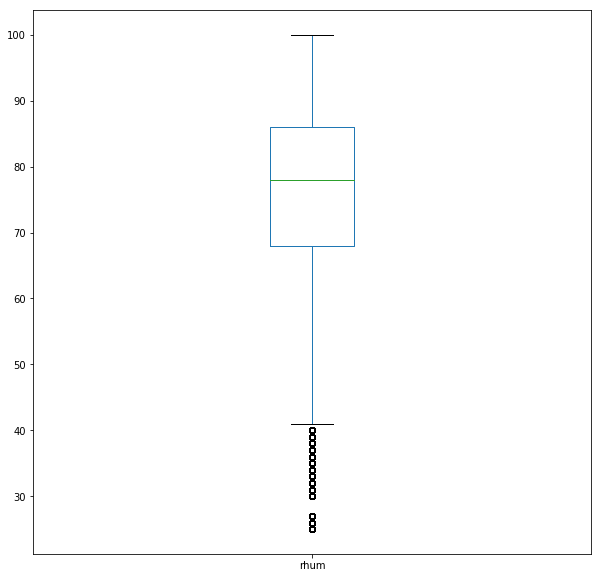

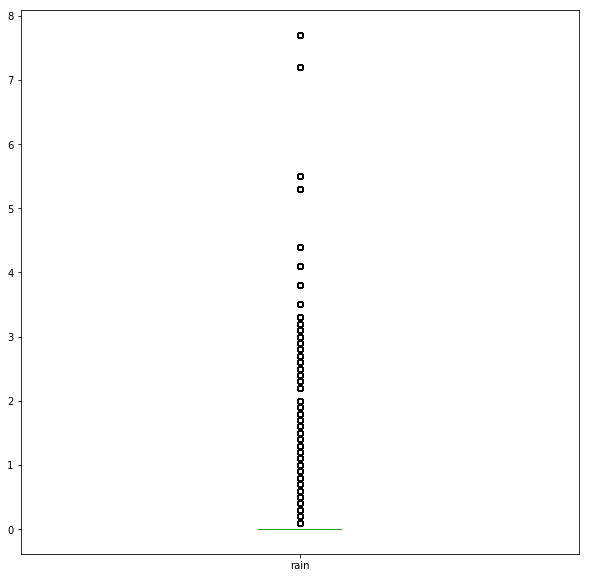

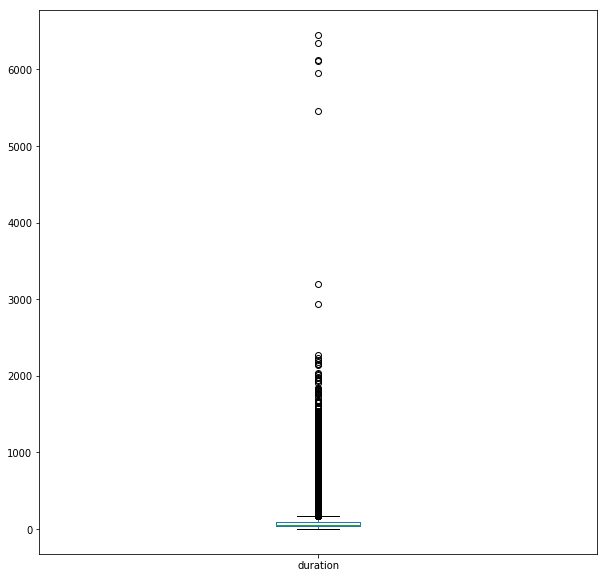

In [21]:
for col in  continuous:
    f = route46A[col].plot(kind='box', figsize=(10,10))
    plt.show()

route46A['duration'].plot(kind='box', figsize=(10,10))

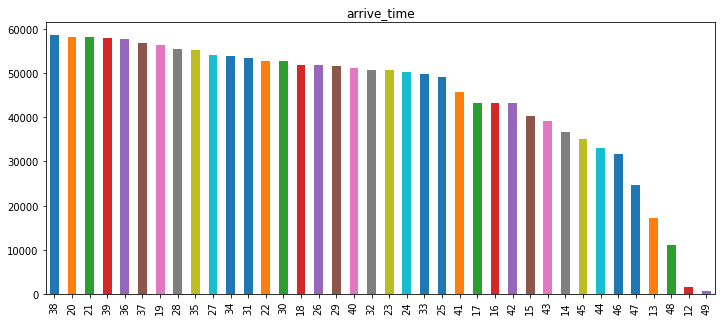

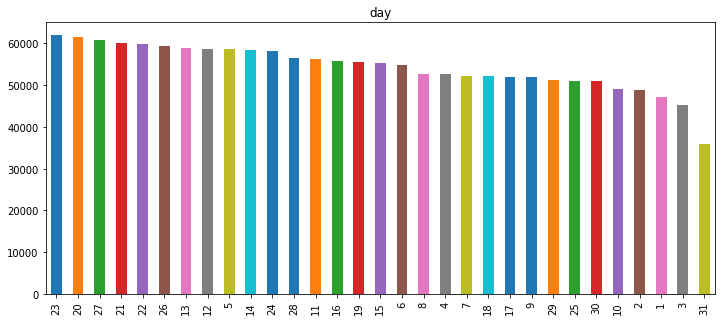

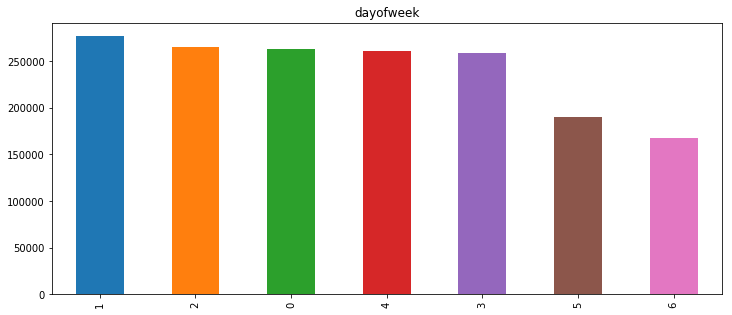

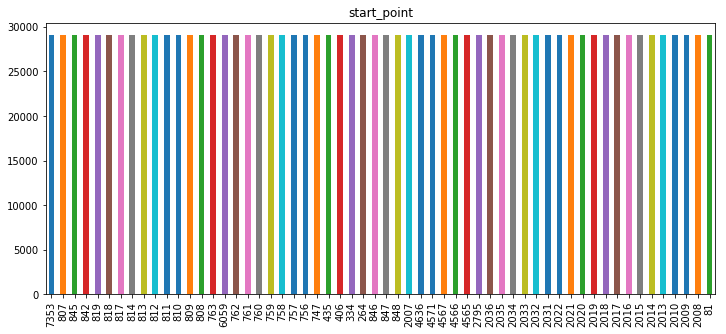

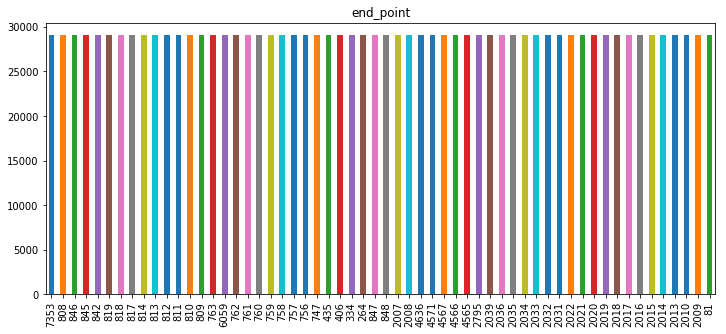

In [22]:
# Plot bar charts for all categorical features and save them in a single PDF file

for column in categorical:
    f = route46A[column].value_counts().plot(kind='bar', title=column, figsize=(12,5))
    plt.show()

In [23]:
sort_by_duation = route46A.sort_values(by='duration',ascending=False)
outliers = sort_by_duation.loc[sort_by_duation['duration'] > 500]
outliers

,arrive_time,date,day,dayofweek,duration,end_point,month,rain,rhum,start_point,temp,tripid,vis,wddir,wdsp
1104030,21,1.527677e+09,30,2,6450.0,808,5,0.0,72.0,807,16.3,6845083.0,25000.0,30.0,9.0
115710,19,1.544088e+09,6,3,6350.0,808,12,0.0,90.0,807,11.8,8161282.0,30000.0,220.0,13.0
296844,37,1.541010e+09,31,2,6117.0,808,10,0.0,78.0,807,8.3,8065608.0,30000.0,240.0,3.0
181540,23,1.542799e+09,21,2,6111.0,808,11,3.0,93.0,807,4.4,8120898.0,10000.0,130.0,8.0
780216,34,1.532106e+09,20,4,5953.0,808,7,0.0,86.0,807,19.3,7174720.0,25000.0,320.0,10.0
1237256,41,1.524515e+09,23,0,5461.0,808,4,0.0,77.0,807,10.1,6644411.0,30000.0,260.0,20.0
1389737,19,1.521452e+09,19,0,3198.0,2039,3,0.0,61.0,2036,2.5,6389793.0,30000.0,70.0,17.0
1390433,18,1.521450e+09,19,0,2932.0,2039,3,0.0,62.0,2036,2.1,6398792.0,30000.0,70.0,15.0
1337653,20,1.522318e+09,29,3,2269.0,2039,3,0.0,82.0,2036,6.1,6583879.0,30000.0,140.0,11.0
675526,16,1.533889e+09,10,4,2229.0,808,8,0.0,83.0,807,11.8,7318909.0,35000.0,260.0,7.0


In [24]:
route46A = route46A[route46A.duration < 500]

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text xticklabel objects>)

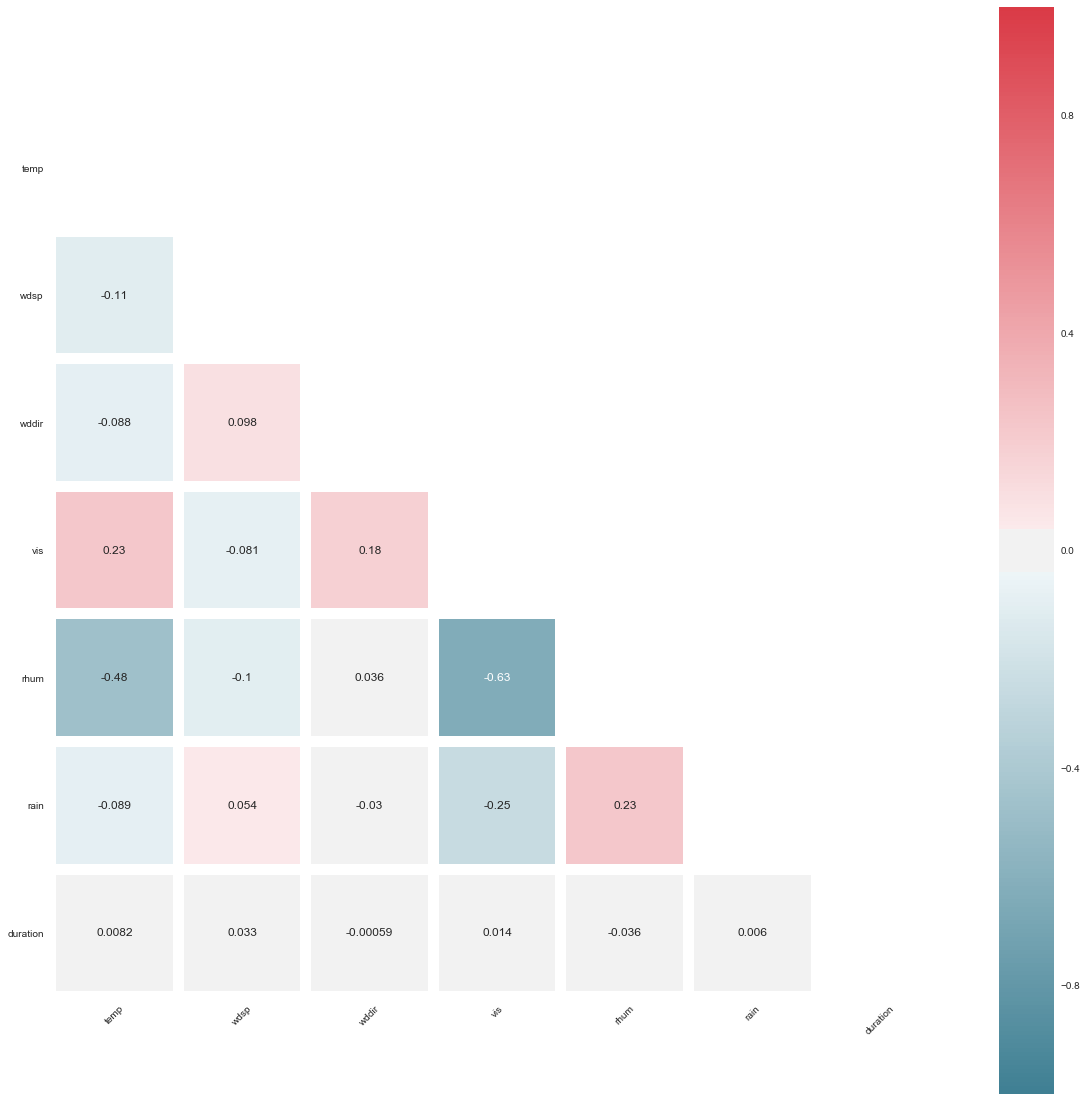

In [25]:
# Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html


sns.set(style='white')

# Calculate correlation of all pairs of continuous features
corr = route46A[continuous + ['duration']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1, square=True, xticklabels=True, yticklabels=True, linewidths=10, cbar_kws={"shrink":1}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)

In [26]:
# Binary Coding of endstop
binary_end_stop = pd.get_dummies(route46A['end_point'],  prefix='end_stop')
# Binary Coding of startstop
binary_start_stop = pd.get_dummies(route46A['start_point'], prefix='start_stop')
# Binary Coding of dayofweek
binary_dayofweek = pd.get_dummies(route46A['dayofweek'], prefix='dayofweek')
# #Binary Coding of arrive time
binary_arrivetime = pd.get_dummies(route46A['arrive_time'],prefix='arrivetime')

In [27]:
df_continouos = route46A[continuous]

df = pd.concat([df_continouos,  binary_end_stop, binary_start_stop, binary_dayofweek, binary_arrivetime], axis=1)
df.head()

,temp,wdsp,wddir,vis,rhum,rain,end_stop_81,end_stop_264,end_stop_334,end_stop_406,...,arrivetime_40,arrivetime_41,arrivetime_42,arrivetime_43,arrivetime_44,arrivetime_45,arrivetime_46,arrivetime_47,arrivetime_48,arrivetime_49
0,12.7,11.0,200.0,15000.0,80.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,12.7,11.0,200.0,15000.0,80.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12.7,11.0,200.0,15000.0,80.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,12.7,11.0,200.0,15000.0,80.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12.7,11.0,200.0,15000.0,80.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
df.dtypes

temp             float64
wdsp             float64
wddir            float64
vis              float64
rhum             float64
rain             float64
end_stop_81        uint8
end_stop_264       uint8
end_stop_334       uint8
end_stop_406       uint8
end_stop_435       uint8
end_stop_747       uint8
end_stop_756       uint8
end_stop_757       uint8
end_stop_758       uint8
end_stop_759       uint8
end_stop_760       uint8
end_stop_761       uint8
end_stop_762       uint8
end_stop_763       uint8
end_stop_808       uint8
end_stop_809       uint8
end_stop_810       uint8
end_stop_811       uint8
end_stop_812       uint8
end_stop_813       uint8
end_stop_814       uint8
end_stop_817       uint8
end_stop_818       uint8
end_stop_819       uint8
                  ...   
arrivetime_20      uint8
arrivetime_21      uint8
arrivetime_22      uint8
arrivetime_23      uint8
arrivetime_24      uint8
arrivetime_25      uint8
arrivetime_26      uint8
arrivetime_27      uint8
arrivetime_28      uint8


In [29]:
total_rows = df.shape[0]
train_rows = int(total_rows * 0.7)
test_rows = int(total_rows * 0.3)

df_new = pd.concat([df, route46A['duration']], axis=1)
df_new = df_new.sample(frac=1)
df_train = df_new.head(train_rows)
df_test = df_new.tail(test_rows)
df_train.head()

,temp,wdsp,wddir,vis,rhum,rain,end_stop_81,end_stop_264,end_stop_334,end_stop_406,...,arrivetime_41,arrivetime_42,arrivetime_43,arrivetime_44,arrivetime_45,arrivetime_46,arrivetime_47,arrivetime_48,arrivetime_49,duration
242862,9.2,9.0,260.0,25000.0,91.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,166.0
1413180,9.4,15.0,140.0,25000.0,81.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,77.0
959613,17.2,9.0,340.0,40000.0,62.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,83.0
422478,12.8,12.0,250.0,40000.0,66.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,243.0
298404,8.3,3.0,240.0,30000.0,78.0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,59.0


In [30]:
# Out put the columns to a file
column_seq = df.columns.tolist()
column_seq

['temp',
 'wdsp',
 'wddir',
 'vis',
 'rhum',
 'rain',
 'end_stop_81',
 'end_stop_264',
 'end_stop_334',
 'end_stop_406',
 'end_stop_435',
 'end_stop_747',
 'end_stop_756',
 'end_stop_757',
 'end_stop_758',
 'end_stop_759',
 'end_stop_760',
 'end_stop_761',
 'end_stop_762',
 'end_stop_763',
 'end_stop_808',
 'end_stop_809',
 'end_stop_810',
 'end_stop_811',
 'end_stop_812',
 'end_stop_813',
 'end_stop_814',
 'end_stop_817',
 'end_stop_818',
 'end_stop_819',
 'end_stop_842',
 'end_stop_845',
 'end_stop_846',
 'end_stop_847',
 'end_stop_848',
 'end_stop_2007',
 'end_stop_2008',
 'end_stop_2009',
 'end_stop_2010',
 'end_stop_2013',
 'end_stop_2014',
 'end_stop_2015',
 'end_stop_2016',
 'end_stop_2017',
 'end_stop_2018',
 'end_stop_2019',
 'end_stop_2020',
 'end_stop_2021',
 'end_stop_2022',
 'end_stop_2031',
 'end_stop_2032',
 'end_stop_2033',
 'end_stop_2034',
 'end_stop_2035',
 'end_stop_2036',
 'end_stop_2039',
 'end_stop_2795',
 'end_stop_4565',
 'end_stop_4566',
 'end_stop_4567',
 'en

In [31]:
pd.DataFrame(data=column_seq, columns=['46A'] ).to_csv('46A_stop_in_one_row.csv', index_label='id')

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
X = df_train.drop('duration', axis = 1)
y = df_train['duration']

model = model.fit(X, y)

In [33]:

model.score(X, y)

0.6162123538063221

In [34]:
from sklearn.metrics import mean_absolute_error

In [35]:
p_y = model.predict(X)
mean_absolute_error(y, p_y)

23.127208582269567

In [36]:
test_x = df_test.drop('duration', axis = 1)
test_y = df_test['duration']
model.score(test_x, test_y)

0.6158492554567536

In [ ]:

model.predict(X)

In [38]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0, n_estimators=80, n_jobs=-1, min_samples_split=5)
regr.fit(X, y)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=80, n_jobs=-1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [39]:
regr.score(X,y)

0.8544397687874453

In [40]:

regr.score(test_x,test_y)

0.6273030358078948

In [42]:
from sklearn.externals import joblib
joblib.dump(model, 'route46a.pkl')

['route46a.pkl']